In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, roc_curve, f1_score

import random

%matplotlib inline

In [2]:
columns = ['age', 'workClass', 'financialWeight', 'education', 'educationNum', 'maritalStatus', 'occupation',
          'relationship', 'race', 'sex', 'capitalGain', 'capitalLoss', 'hoursPerWeek', 'nativeCountry', 'incomeTarget']
len(columns)

15

In [3]:
train_df = pd.read_csv('../data/adult-train.csv', names=columns)
train_df.head()

,age,workClass,financialWeight,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,incomeTarget
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
train_df.shape

(32561, 15)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1   workClass        32561 non-null  object
 2   financialWeight  32561 non-null  int64 
 3   education        32561 non-null  object
 4   educationNum     32561 non-null  int64 
 5   maritalStatus    32561 non-null  object
 6   occupation       32561 non-null  object
 7   relationship     32561 non-null  object
 8   race             32561 non-null  object
 9   sex              32561 non-null  object
 10  capitalGain      32561 non-null  int64 
 11  capitalLoss      32561 non-null  int64 
 12  hoursPerWeek     32561 non-null  int64 
 13  nativeCountry    32561 non-null  object
 14  incomeTarget     32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
for col in train_df[columns]:
    print('==================================', col, '==================================')
    print(train_df[col].unique())

================================== age ==================================
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
================================== workClass ==================================
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
================================== financialWeight ==================================
[ 77516  83311 215646 ...  34066  84661 257302]
================================== education ==================================
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
================================== educationNum ==================================
[13  9  7 1

In [8]:
test_df = pd.read_csv('../data/adult-test.csv', names=columns, skiprows=1)
test_df.head()

,age,workClass,financialWeight,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,incomeTarget
0,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
1,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
2,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
3,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [9]:
train_df.head(10)

,age,workClass,financialWeight,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,incomeTarget
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [10]:
transformed_target = []
for _, value in train_df['incomeTarget'].iteritems():
    if value == ' <=50K':
        transformed_target.append(0)
    else:
        transformed_target.append(1)
train_df['incomeTarget'] = transformed_target

In [11]:
train_df.head(10)

,age,workClass,financialWeight,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,incomeTarget
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1


In [12]:
train_df.drop('nativeCountry', axis=1, inplace=True)

In [13]:
categorical = ['workClass', 'education', 'maritalStatus', 'occupation', 'relationship', 'race', 'sex']
numerical = ['financialWeight', 'educationNum', 'capitalGain', 'capitalLoss', 'hoursPerWeek']

train_df[categorical] = train_df[categorical].astype(str)

In [14]:
target = 'incomeTarget'

In [15]:
train_df.head(10)

,age,workClass,financialWeight,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,incomeTarget
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,1


<AxesSubplot:xlabel='incomeTarget', ylabel='count'>

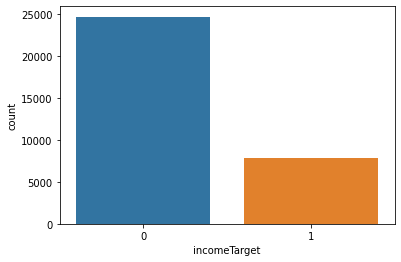

In [16]:
sns.countplot(x=train_df[target])

In [17]:
y_train = train_df[target]
X_train = train_df.drop('incomeTarget', axis=1, inplace=True)
X_train = pd.get_dummies(train_df)
X_train.head()

,age,financialWeight,educationNum,capitalGain,capitalLoss,hoursPerWeek,workClass_ ?,workClass_ Federal-gov,workClass_ Local-gov,workClass_ Never-worked,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0


In [18]:
# Upsampling
X_train_u, y_train_u = resample(X_train[y_train == 1],
                               y_train[y_train == 1],
                               replace=True,
                               n_samples=X_train[y_train == 0].shape[0],
                               random_state=1)

X_train_u = np.concatenate((X_train[y_train == 0], X_train_u))
y_train_u = np.concatenate((y_train[y_train == 0], y_train_u))

# Upsample using SMOTE
sm = SMOTE(random_state=12)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

# Downsample majority class
X_train_d, y_train_d = resample(X_train[y_train == 0],
                               y_train[y_train == 0],
                               replace=True,
                               n_samples=X_train[y_train == 1].shape[0],
                               random_state=1)

X_train_d = np.concatenate((X_train[y_train == 1], X_train_d))
y_train_d = np.concatenate((y_train[y_train == 1], y_train_d))

# Show datset sizes for each sampling technique and compare with original dataset
print("Original shape:", X_train.shape, y_train.shape)
print("Upsampled shape:", X_train_u.shape, y_train_u.shape)
print("SMOTE sample shape:", X_train_sm.shape, y_train_sm.shape)
print("Downsampled shape:", X_train_d.shape, y_train_d.shape)

Original shape: (32561, 66) (32561,)
Upsampled shape: (49440, 66) (49440,)
SMOTE sample shape: (49440, 66) (49440,)
Downsampled shape: (15682, 66) (15682,)


Text(0.5, 1.0, 'Downsampled Dataset')

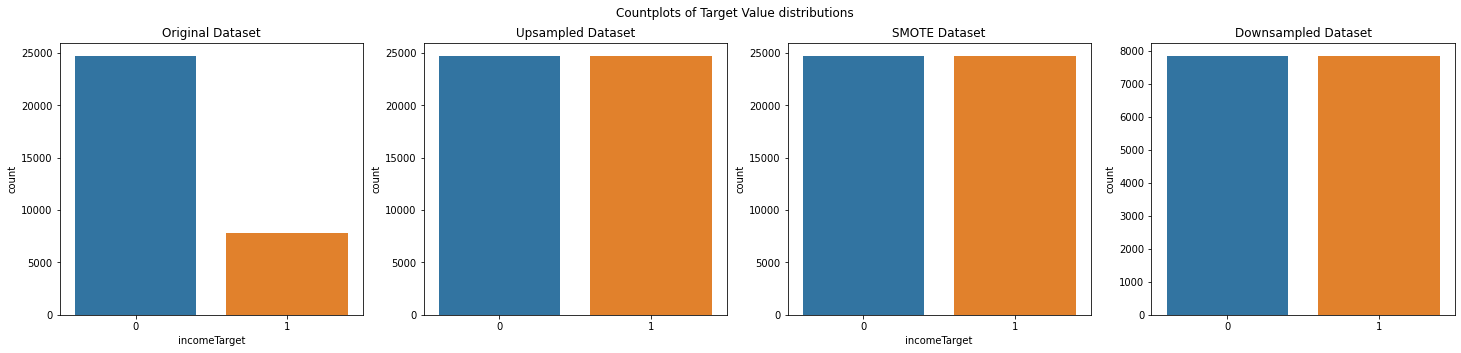

In [19]:
fig, axes = plt.subplots(1,4, figsize=(25,5))
fig.suptitle("Countplots of Target Value distributions")

sns.countplot(ax=axes[0], x = y_train)
axes[0].set_title("Original Dataset")

sns.countplot(ax=axes[1], x = y_train_u)
axes[1].set_title("Upsampled Dataset")

sns.countplot(ax=axes[2], x = y_train_sm)
axes[2].set_title("SMOTE Dataset")

sns.countplot(ax=axes[3], x = y_train_d)
axes[3].set_title("Downsampled Dataset")

In [20]:
# Create the Original, Upsampled, and Downsampled Training Sets
methods_data = {
    "Original": (X_train, y_train),
    "Upsampled": (X_train_u, y_train_u),
    "SMOTE": (X_train_sm, y_train_sm),
    "Downsampled": (X_train_d, y_train_d)
}

# Loop through each type of training sets and apply 5-Fold cross-validation using Logistic Regression
# By default, cross_val_score uses StratifiedCV
for method in methods_data.keys():
    log_reg_results = cross_val_score(LogisticRegression(max_iter=800, random_state=random.seed(12345)), methods_data[method][0], methods_data[method][1], cv=5, scoring='f1')
    print(f"The best F1 Score for {method} data is:", log_reg_results.mean())
    
cross_val_score(LogisticRegression(class_weight='balanced', max_iter=800), X_train, y_train, cv=5, scoring='f1').mean()

The best F1 Score for Original data is: 0.39145125979932927
The best F1 Score for Upsampled data is: 0.6110777220120076
The best F1 Score for SMOTE data is: 0.5898477965167077
The best F1 Score for Downsampled data is: 0.6021456922168016


0.48003985056667703

In [21]:
train_df_new = pd.DataFrame(X_train_u, columns=X_train.columns)

In [22]:
train_df_new.head()

,age,financialWeight,educationNum,capitalGain,capitalLoss,hoursPerWeek,workClass_ ?,workClass_ Federal-gov,workClass_ Local-gov,workClass_ Never-worked,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0


In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_df_new)
X_train_df = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_train_df.head()

,age,financialWeight,educationNum,capitalGain,capitalLoss,hoursPerWeek,workClass_ ?,workClass_ Federal-gov,workClass_ Local-gov,workClass_ Never-worked,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,-0.118568,-1.060401,0.916644,0.015926,-0.256758,-0.174363,-0.219473,-0.194492,-0.274147,-0.0119,...,-0.343284,-0.293983,-0.265520,-0.088707,-0.183115,-0.295483,-0.080586,0.381417,-0.609605,0.609605
1,0.732487,-1.005359,0.916644,-0.196287,-0.256758,-2.415134,-0.219473,-0.194492,-0.274147,-0.0119,...,-0.343284,-0.293983,-0.265520,-0.088707,-0.183115,-0.295483,-0.080586,0.381417,-0.609605,0.609605
2,-0.195936,0.251572,-0.615914,-0.196287,-0.256758,-0.174363,-0.219473,-0.194492,-0.274147,-0.0119,...,-0.343284,-0.293983,-0.265520,-0.088707,-0.183115,-0.295483,-0.080586,0.381417,-0.609605,0.609605
3,0.964592,0.432749,-1.382193,-0.196287,-0.256758,-0.174363,-0.219473,-0.194492,-0.274147,-0.0119,...,-0.343284,-0.293983,-0.265520,-0.088707,-0.183115,3.384287,-0.080586,-2.621806,-0.609605,0.609605
4,-0.969622,1.417588,0.916644,-0.196287,-0.256758,-0.174363,-0.219473,-0.194492,-0.274147,-0.0119,...,-0.343284,-0.293983,3.766202,-0.088707,-0.183115,3.384287,-0.080586,-2.621806,1.640405,-1.640405


In [24]:
train_dicts = X_train_df.to_dict(orient='records')

dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

y_train = y_train_u

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_train)

In [25]:
f1_score(y_train, y_pred)

0.8288718363482138

In [26]:
print("\n\n ---LOGISTIC REGRESSION CLASSIFIER MODEL---")
auc = roc_auc_score(y_train, y_pred)
accuracy = accuracy_score(y_train, y_pred)

print("Accuracy Score= %2.2f" % accuracy)
print("Area Under the ROC Curve = %2.2f" % auc)
print(confusion_matrix(y_train, y_pred,labels=[1,0]))
print(classification_report(y_train, y_pred, labels=[1,0]))



 ---LOGISTIC REGRESSION CLASSIFIER MODEL---
Accuracy Score= 0.82
Area Under the ROC Curve = 0.82
[[21009  3711]
 [ 4964 19756]]
              precision    recall  f1-score   support

           1       0.81      0.85      0.83     24720
           0       0.84      0.80      0.82     24720

    accuracy                           0.82     49440
   macro avg       0.83      0.82      0.82     49440
weighted avg       0.83      0.82      0.82     49440



In [27]:
def process_dataframe(filepath):
    columns = ['age', 'workClass', 'financialWeight', 'education', 'educationNum', 'maritalStatus', 'occupation',
          'relationship', 'race', 'sex', 'capitalGain', 'capitalLoss', 'hoursPerWeek', 'nativeCountry', 'incomeTarget']
    
    target = 'incomeTarget'

    df = pd.read_csv(filepath, names=columns)

    transformed_target = []

    for _, value in df['incomeTarget'].iteritems():
        if value == ' <=50K':
            transformed_target.append(0)
        else:
            transformed_target.append(1)
    df['incomeTarget'] = transformed_target

    df.drop('nativeCountry', axis=1, inplace=True)
    
    y = df[target]
    X = df.drop('incomeTarget', axis=1, inplace=True)
    X = pd.get_dummies(df)
    
    # Upsampling
    X_upsampled, y_upsampled = resample(X[y == 1],
                                   y[y == 1],
                                   replace=True,
                                   n_samples=X[y == 0].shape[0],
                                   random_state=1)

    X_upsampled = np.concatenate((X[y == 0], X_upsampled))
    y_upsampled = np.concatenate((y[y == 0], y_upsampled))

    
    df_new = pd.DataFrame(X_upsampled, columns=X.columns)
    
    return df_new, y_upsampled

In [28]:
X_train, y_train = process_dataframe('../data/adult-train.csv')
X_val, y_val = process_dataframe('../data/adult-test.csv')

len(X_train), len(y_train), len(X_val), len(y_val)

(49440, 49440, 24870, 24870)

In [29]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_df = pd.DataFrame(X_train_scaled, columns = X_train.columns)

X_val_scaled = scaler.transform(X_val)
X_val_df = pd.DataFrame(X_val_scaled, columns = X_val.columns)

In [30]:
dv = DictVectorizer()

train_dicts = X_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = X_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [31]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_val)

In [32]:
f1_score(y_val, y_pred)

0.7183564231738035

In [33]:
print("\n\n ---LOGISTIC REGRESSION CLASSIFIER MODEL---")
auc = roc_auc_score(y_val, y_pred)
accuracy = accuracy_score(y_val, y_pred)

print("Accuracy Score= %2.2f" % accuracy)
print("Area Under the ROC Curve = %2.2f" % auc)
print(confusion_matrix(y_val, y_pred,labels=[1,0]))
print(classification_report(y_val, y_pred, labels=[1,0]))



 ---LOGISTIC REGRESSION CLASSIFIER MODEL---
Accuracy Score= 0.71
Area Under the ROC Curve = 0.71
[[9126 3309]
 [3847 8588]]
              precision    recall  f1-score   support

           1       0.70      0.73      0.72     12435
           0       0.72      0.69      0.71     12435

    accuracy                           0.71     24870
   macro avg       0.71      0.71      0.71     24870
weighted avg       0.71      0.71      0.71     24870

